# Example Growth Charts

Work to show the possible examples.

Two main dictionaries are created:

1. DDStats, indexed as a function of calendar day
2. GStats, indexed as a function of team games played

For the future, apply the boolean mask to make
3. BStats, indexed as a function of potential games played

In [1]:
# give python3 compatibility
from __future__ import print_function

In [4]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import time

import matplotlib as mpl

import datetime

# imports for scraping

from bs4 import BeautifulSoup
import requests
import pandas as pd



In [7]:

url      =   "http://www.foxsports.com/mlb/transactions?year={0}&month={1}&type={2}"
months = range(0,12)
dl_down_types = [25, #15
            30, #60
            65, # 7
            76] # 10
dl_up_types = [35, #15
            37, #60
            67, # 7
            77] # 10

def Grab_Transaction_Data(in_year, month_list, in_transation_list):
    rows = []
    for month in month_list:
        for dl in dl_down_types:
            year_url = url.format(str(in_year), str(month), str(dl))
            r               = requests.get(year_url)
            soup            = BeautifulSoup(r.content)
            paginatory      = soup.find("div", { "class" : "wisbb_paginator"}) 
            if paginatory != None:
                for anchor in paginatory.findAll('a'):
                    print(year_url)
                    print(anchor.text)
            table_data      = soup.find("table", { "class" : "wisbb_standardTable wisbb_altRowColors"})   
            if table_data == None:
                pass
            else: 
                headers = [header.text for header in table_data.findAll('th')]
                for row in table_data.findAll("tr"):
                    cells = row.findAll("td")
                    if len(cells) == 4:
                        new_row = []
                        for anchor in cells[0].findAll('a'):
                             new_row.append(anchor.text)
                        for anchor in cells[1].findAll('a'):
                             new_row.append(anchor.text)
                        for i in cells[2:]:
                            new_row.append(i.find(text=True))
                        new_row.append(dl)
                        new_row.append(month)
                        rows.append(new_row)
    strip_rows = []
    for row in rows:
        strip_rows.append([str(row[1]),
                           str(row[3]),
                           str(row[4]),
                           str(row[5]),
                           row[6],
                           row[7]])
    headers.append("DL Code")
    headers.append("Month")
    df = pd.DataFrame(strip_rows, columns=headers)
    df['Date Time'] = pd.to_datetime(df['Date']+"/{0}".format(in_year))
    return df

up_transactions = Grab_Transaction_Data('2017', months[:11], dl_up_types)
down_transactions = Grab_Transaction_Data('2017', months[:11], dl_down_types)
unique_names = down_transactions.groupby("Player")['Player'].first()


http://www.foxsports.com/mlb/transactions?year=2017&month=5&type=76
2
http://www.foxsports.com/mlb/transactions?year=2017&month=5&type=76
Next ▸
http://www.foxsports.com/mlb/transactions?year=2017&month=6&type=76
2
http://www.foxsports.com/mlb/transactions?year=2017&month=6&type=76
3
http://www.foxsports.com/mlb/transactions?year=2017&month=6&type=76
Next ▸
http://www.foxsports.com/mlb/transactions?year=2017&month=7&type=76
2
http://www.foxsports.com/mlb/transactions?year=2017&month=7&type=76
Next ▸
http://www.foxsports.com/mlb/transactions?year=2017&month=8&type=76
2
http://www.foxsports.com/mlb/transactions?year=2017&month=8&type=76
3
http://www.foxsports.com/mlb/transactions?year=2017&month=8&type=76
Next ▸


UnicodeEncodeError: 'ascii' codec can't encode character u'\xed' in position 4: ordinal not in range(128)

In [ ]:
print(up_transactions)


In [6]:

# Grab 2017 Down Data
rows = []
for month in months:
    for dl in dl_down_types:
        year_url = url.format(str(2016), str(month), str(dl))
#        year_url = url.format(str(2017), str(4), str(0))
        r               = requests.get(year_url)
        soup            = BeautifulSoup(r.content)
#        text_file = open("Output2.txt", "w")
#        text_file.write(str(soup))
#        text_file.close()
        paginatory      = soup.find("div", { "class" : "wisbb_paginator"}) 
        if paginatory != None:
            for anchor in paginatory.findAll('a'):
                print year_url
                print anchor.text
        table_data      = soup.find("table", { "class" : "wisbb_standardTable wisbb_altRowColors"})   
        if table_data == None:
            pass
        else: 
            headers = [header.text for header in table_data.findAll('th')]
            # All of our data is in a 'Beautiful Soup' but we think in tables so let's coerce this data into a shape
            for row in table_data.findAll("tr"):
                cells = row.findAll("td")
                if len(cells) == 4:
                    new_row = []
                    for anchor in cells[0].findAll('a'):
                         new_row.append(anchor.text)
                    for anchor in cells[1].findAll('a'):
                         new_row.append(anchor.text)
                    for i in cells[2:]:
                        new_row.append(i.find(text=True))
                    new_row.append(dl)
                    new_row.append(month)
                    rows.append(new_row)

# Damn that was a shit way to do things. Strip out the unnecessary stuff.
strip_rows = []
for row in rows:
    strip_rows.append([str(row[1]),
                       str(row[3]),
                       str(row[4]),
                       str(row[5]),
                       row[6],
                       row[7]])

## Great, our Data is in a list of lists: much more pythonic. Let's birth a pandas table!
headers.append("DL Code")
headers.append("Month")
df16 = pd.DataFrame(strip_rows, columns=headers)
df16['Date Time'] = pd.to_datetime(df16['Date']+"/2016")

rows = []
for month in months[:10]:
    for dl in dl_types:
        year_url = url.format(str(2017), str(month), str(dl))
#        year_url = url.format(str(2017), str(4), str(0))
        r               = requests.get(year_url)
        soup            = BeautifulSoup(r.content)
#        text_file = open("Output2.txt", "w")
#        text_file.write(str(soup))
#        text_file.close()
        paginatory      = soup.find("div", { "class" : "wisbb_paginator"}) 
        if paginatory != None:
            for anchor in paginatory.findAll('a'):
                print(year_url)
                print(anchor.text)
        table_data      = soup.find("table", { "class" : "wisbb_standardTable wisbb_altRowColors"})   
        if table_data == None:
            pass
        else: 
#            headers = [header.text for header in table_data.findAll('th')]
            # All of our data is in a 'Beautiful Soup' but we think in tables so let's coerce this data into a shape
            for row in table_data.findAll("tr"):
                cells = row.findAll("td")
                if len(cells) == 4:
                    new_row = []
                    for anchor in cells[0].findAll('a'):
                         new_row.append(anchor.text)
                    for anchor in cells[1].findAll('a'):
                         new_row.append(anchor.text)
                    for i in cells[2:]:
                        new_row.append(i.find(text=True))
                    new_row.append(dl)
                    new_row.append(month)
                    rows.append(new_row)

# Damn that was a shit way to do things. Strip out the unnecessary stuff.
strip_rows = []
for row in rows:
    strip_rows.append([str(row[1]),
                       str(row[3]),
                       str(row[4]),
                       str(row[5]),
                       row[6],
                       row[7]])



SyntaxError: invalid syntax (<ipython-input-6-cf9daa862710>, line 16)

In [10]:
# reorganize with game numbers(e.g. including days the team played and they sat)

zero_day = 75
max_day = 300
buff = 50

GStats = {}

# loop for each stat
for key1 in np.array(DDStats.keys()):
    
    GStats[key1] = {}
    
    # loop for each player
    for key2 in np.array(DDStats[key1].keys()):
        
        # initialize arrays (strings for team names and positions)
        if key1 in ['OPP','POS','TEAM']:
            GStats[key1][key2] = np.zeros(max_day-zero_day+buff,dtype='S5')
            
        # zeros for everything else
        else:
            GStats[key1][key2] = np.zeros(max_day-zero_day+buff) + np.nan
            
        # step through each calendar day
        gnum = 0 # log of each game number
        for indx,val in enumerate(DDStats[key1][key2]):
            
            # in this loop, indx is the number of days from march 16th
                        
            # step 1: did the player have plate appearances on a given day?
            if DDStats['POS'][key2][indx] != '':
                GStats[key1][key2][gnum] = DDStats[key1][key2][indx]
                gnum += 1
                
            # step 2: were they on the DL?
            
            #
            # here is where the boolean mask gets plugged in
            #
                
            # step 3: if neither of above, did their team play?
            else:
                # identify which team player is on (forward-looking)
                indx1 = 0
                while (DDStats['TEAM'][key2][indx+indx1] == '') & (indx1 < 3) & (indx < 210):
                    indx1 += 1

                # once out of loop, identify which team
                which_team = DDStats['TEAM'][key2][indx+indx1]
                
                # check if team had a game: if yes, advance one day
                if which_team != '':
                    if (indx+zero_day) in GGDict[translate_team(team_translate,which_team)]:
                        #print('off day')
                        GStats[key1][key2][gnum] = 0.#GStats[key1][key2][gnum-1]
                        gnum += 1
                



### Open Questions

1. How to treat DL?
2. How to treat off days?

### Desired Functionality

1. By batting order
2. By position
3. By age
4. By opponent?

956


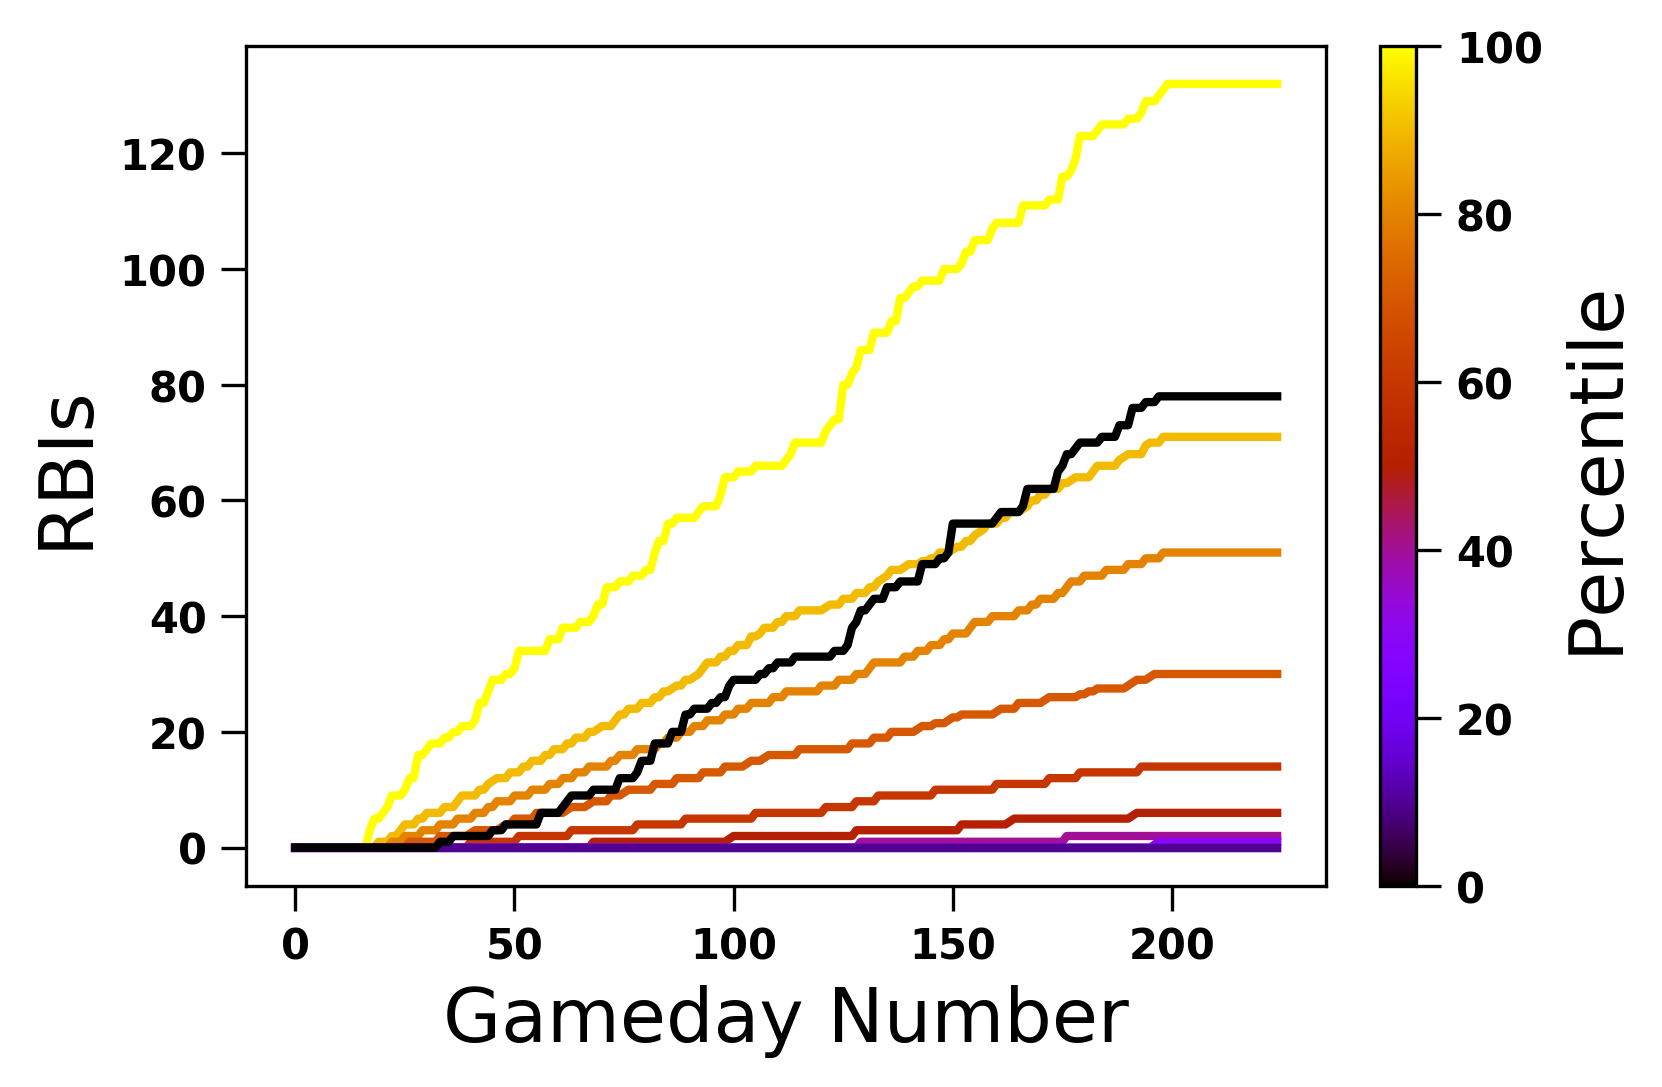

In [6]:
#
# Example 1: RBI across the league (no PA cuts), with Whit imposed
#

PAlist = np.zeros([len(np.array(DDStats['PA'].keys())),max_day-zero_day])


stat = 'RBI'
print(len(np.array(DDStats[stat].keys())) )

for indx,player in enumerate(DDStats[stat].keys()):
    PAlist[indx] = np.cumsum(DDStats[stat][player])


fig = plt.figure()
ax = fig.add_axes([0.18,0.22,0.6,0.7])
ax2 = fig.add_axes([0.81,0.22,0.02,0.7])

    
    
for perc in range(100,0,-10):
    ax.plot(np.percentile(PAlist,perc,axis=0),color=cm.gnuplot(float(perc/100.),1.))
    

ax.plot(np.cumsum(DDStats[stat]['Whit Merrifield']),color='black')

    
ax.set_ylabel('RBIs',size=18)
ax.set_xlabel('Gameday Number',size=18)
    
cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0, vmax=100)
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('Percentile',size=18)





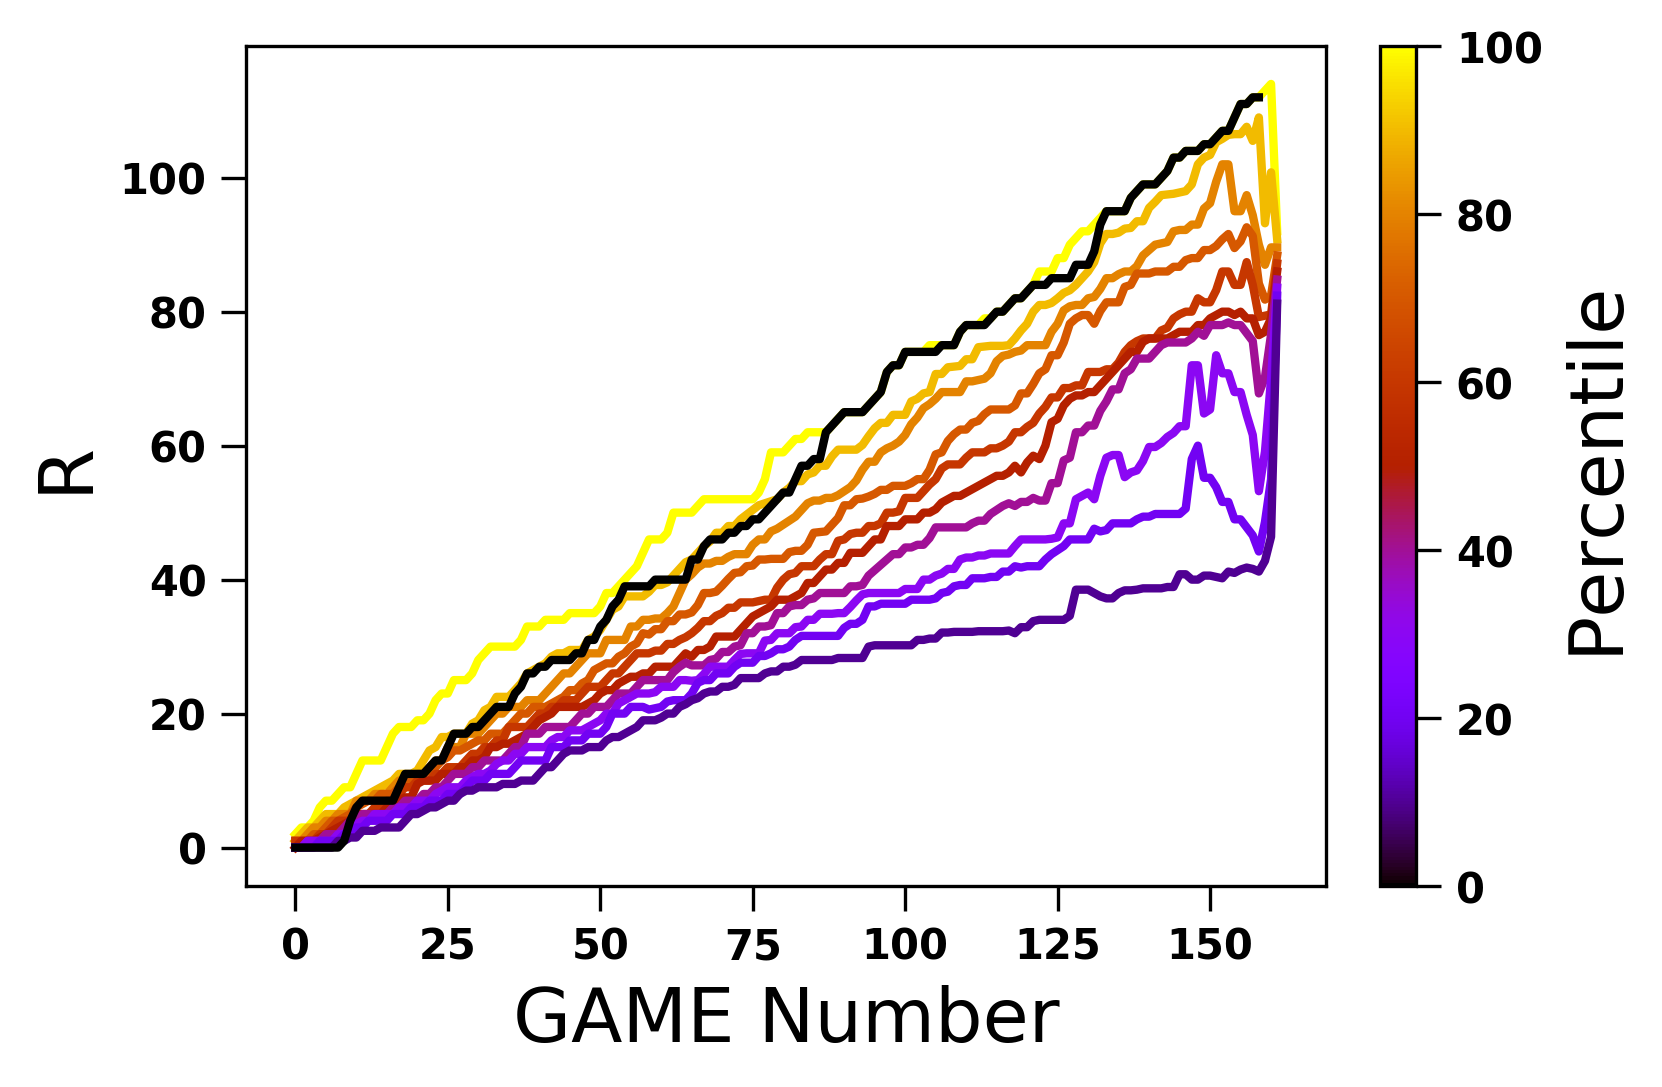

In [11]:
#
# Example 2: runs for second basemen who started >50 games, sorted by game numbers
#    with Jose Altuve plotted over the top

buff = 50
des_pos = '2B'


plist = []

for indx,plr in enumerate(DDStats['POS'].keys()):
    if len(np.where(GStats['POS'][plr] == des_pos)[0]) > 50:
        plist.append(plr)
        

PAlist = np.zeros([len(plist),max_day-zero_day+buff])



stat = 'R'
#print(len(np.array(DDStats[stat].keys())) )

#for indx,player in enumerate(DDStats[stat].keys()):
for indx,player in enumerate(np.array(plist)):
    
    PAlist[indx] = np.cumsum(GStats[stat][player])


fig = plt.figure()
ax = fig.add_axes([0.18,0.22,0.6,0.7])
ax2 = fig.add_axes([0.81,0.22,0.02,0.7])

    
    
for perc in range(100,0,-10):
    ax.plot(np.nanpercentile(PAlist,perc,axis=0),color=cm.gnuplot(float(perc/100.),1.))
    

ax.plot(np.cumsum(GStats[stat]['Jose Altuve']),color='black')


    
ax.set_ylabel(stat,size=18)
ax.set_xlabel('GAME Number',size=18)
    
cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0, vmax=100)
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('Percentile',size=18)




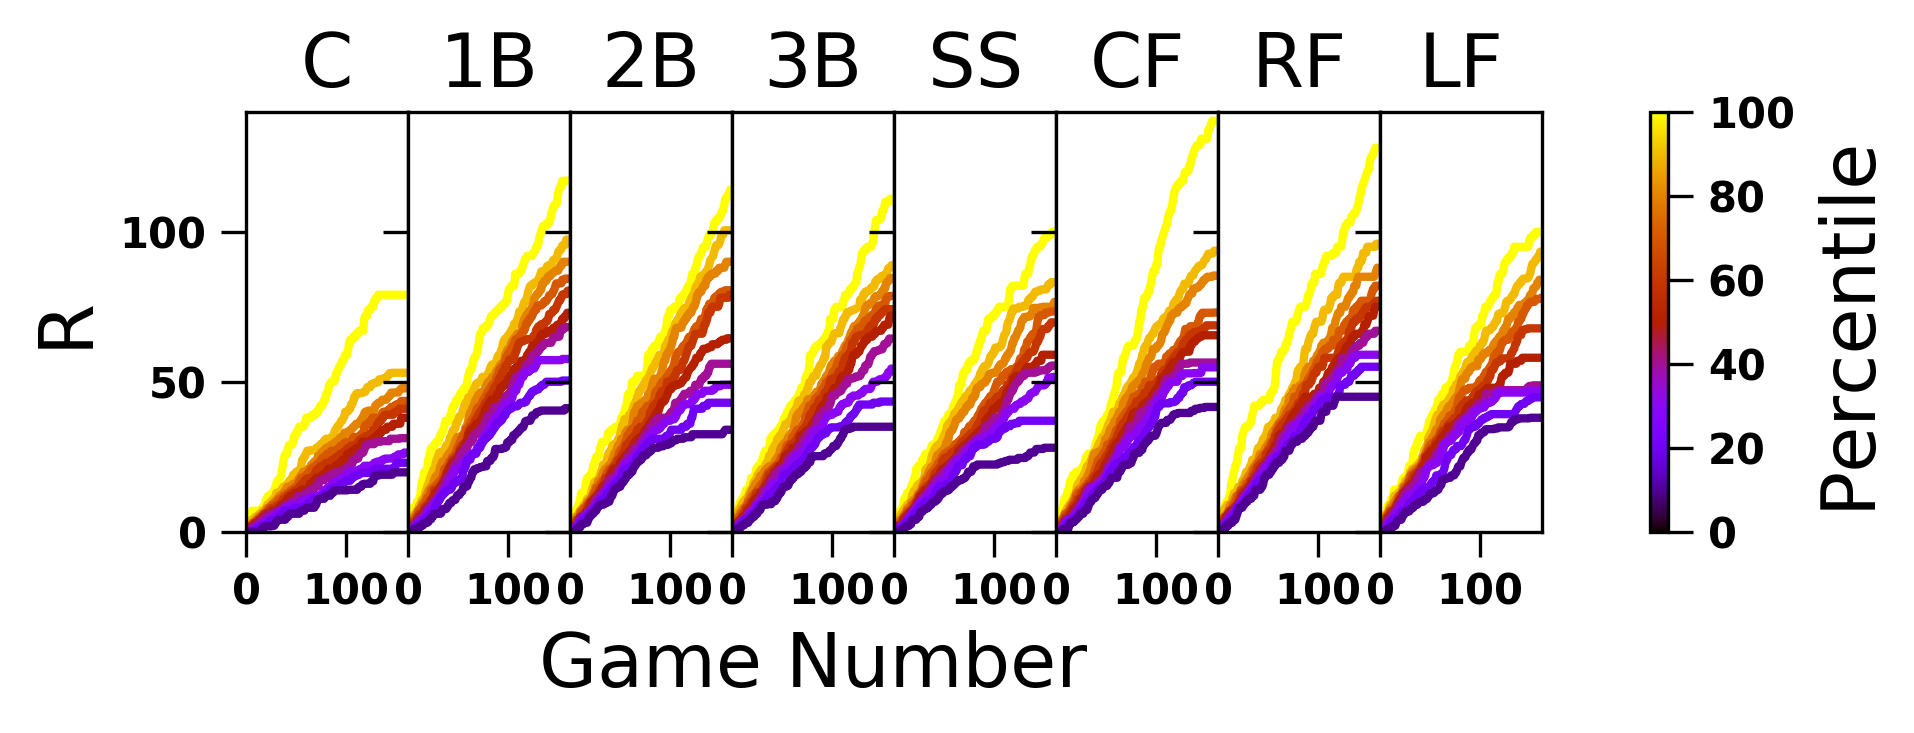

In [8]:
#
# Example 3: several positions, plotting R
#
fig = plt.figure(figsize=(6,2))

for indx1,des_pos in enumerate(np.array(['C','1B','2B','3B','SS','CF','RF','LF'])):
    
    ax = fig.add_axes([0.12+(indx1*(0.75-.12)/7.),0.22,(0.75-.12)/7.,0.7])


    plist = []

    for indx,plr in enumerate(GStats['POS'].keys()):
        
        try:
            if len(np.where(GStats['POS'][plr] == des_pos)[0]) > 50:
                plist.append(plr)
        except:
            pass


    PAlist = np.zeros([len(plist),max_day-zero_day+buff])


    stat = 'R'

    for indx,player in enumerate(np.array(plist)):

        PAlist[indx] = np.nancumsum(GStats[stat][player])


    for perc in range(100,0,-10):
        ax.plot(np.percentile(PAlist,perc,axis=0),color=cm.gnuplot(float(perc/100.),1.))


    if indx1==0: 
        ax.set_ylabel(stat,size=18)
    else:
        ax.set_yticklabels(())
        
    if indx1==3: ax.set_xlabel('Game Number',size=18)
    ax.set_title(des_pos,size=18)

    ax.axis([0.0,162.,0.,140.])
    

ax2 = fig.add_axes([0.90,0.22,0.01,0.7])


cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0, vmax=100)
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('Percentile',size=18)



